In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [2]:
## Importing the datasets
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")

# Make a copy from training data
df = train_df.copy()

In [3]:
print(df.columns)
df.info()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O'] # check if df[feature] is not 'O' (Object)
print('Number of numerical variables: ', len(numerical_features))
print('-'*100)
print('Numerical Variables Column: ',numerical_features)

Number of numerical variables:  7
----------------------------------------------------------------------------------------------------
Numerical Variables Column:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [5]:
# list of categorical variables
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O'] # check if df[feature] is 'O' (Object)
print('Number of categorical variables: ', len(cat_features))
print('-'*80)
print('Categorical variables column name:',cat_features)

Number of categorical variables:  5
--------------------------------------------------------------------------------
Categorical variables column name: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


**Categorical**: 
    Nominal: Survived, Sex, Embarked.
    Ordinal: Pclass.

**Quantitive**:
    Continous: Age, Fare.
    Discrete: SibSp, Parch.
    

**features are mixed**

Ticket is a mix of numeric and alphanumeric data types
Cabin is alphanumeric

**features may contain errors or typos**

Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [6]:
# percentage of missing values
print("Percentage of missing values in each feature:\n{}".format((df.isnull().sum()/len(df)) * 100))

Percentage of missing values in each feature:
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


need to delete 'Cabine' feature because missing values percentage more than 40% and will fill missing values in other features.

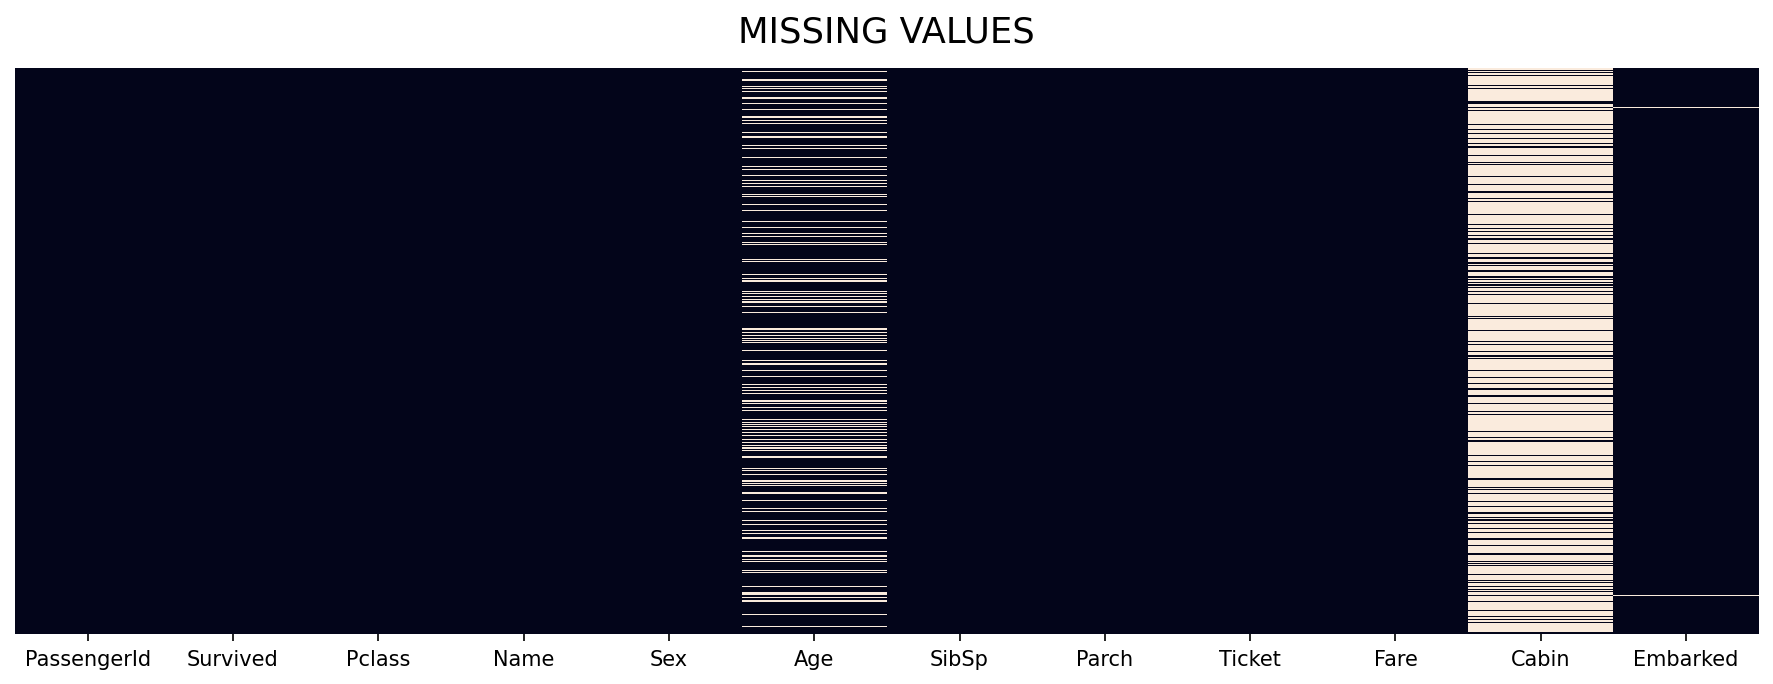

In [7]:
# Detect missing values
missing = df.isnull()

# Visualisation
plt.figure(figsize=(15,5), dpi=150)
sns.heatmap(missing,yticklabels=False, cbar=False, cmap=None)
plt.title('MISSING VALUES', size=17, pad=13)
plt.show()

In [8]:
df.drop(columns=['Cabin','PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [9]:
df[pd.isnull(df.Embarked)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [10]:
# replace missing values with the char has the most frequency
df.Embarked.fillna((df['Embarked'].value_counts()).idxmax(),inplace = True)

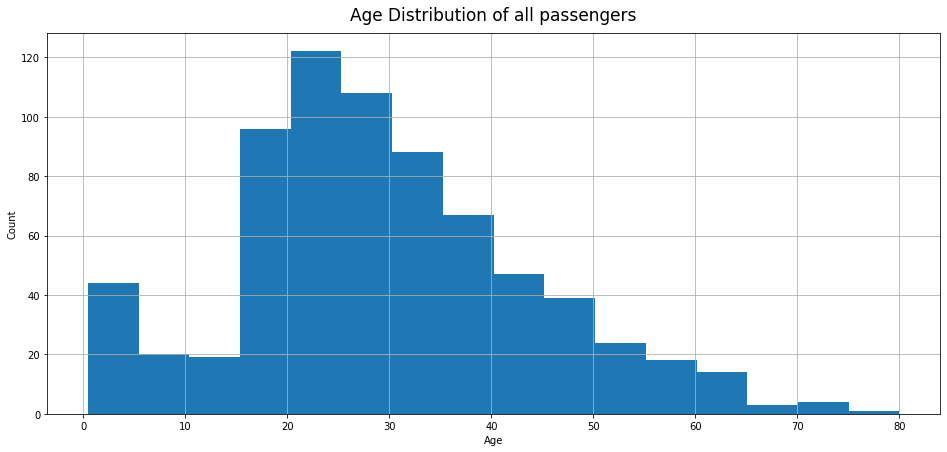

In [11]:
df['Age'].hist(bins=16 ,figsize=(16,7))
plt.title('Age Distribution of all passengers', size=17, pad=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)


In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
# Grouping Column 'Sex' to see the average age or women and men
grouped_sex_age = df.groupby(['Sex']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_age

,len,min,max,mean,median
Sex,,,,,
female,314.0,0.75,63.0,27.915709,27.0
male,577.0,0.42,80.0,30.726645,29.0


In [14]:
# Grouping the 'Pclass' to see if the average age changes from class to class
grouped_class_age = df.groupby(['Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_class_age

,len,min,max,mean,median
Pclass,,,,,
1,216.0,0.92,80.0,38.233441,37.0
2,184.0,0.67,70.0,29.877630,29.0
3,491.0,0.42,74.0,25.140620,24.0


In [15]:
# Checking the (aveage) age and amount of people for each class and sex
grouped_sex_pclass_age = df.groupby(['Sex', 'Pclass']).Age.agg([len, min, max, 'mean', 'median'])
grouped_sex_pclass_age

len   min   max       mean  median
Sex    Pclass                                      
female 1        94.0  2.00  63.0  34.611765    35.0
       2        76.0  2.00  57.0  28.722973    28.0
       3       144.0  0.75  63.0  21.750000    21.5
male   1       122.0  0.92  80.0  41.281386    40.0
       2       108.0  0.67  70.0  30.740707    30.0
       3       347.0  0.42  74.0  26.507589    25.0

In [16]:
df['Age'] = df.apply(lambda x: grouped_sex_pclass_age.loc[x['Sex'], x['Pclass']]['median'] if (np.isnan(x['Age'])) else x['Age'],axis = 1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [17]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

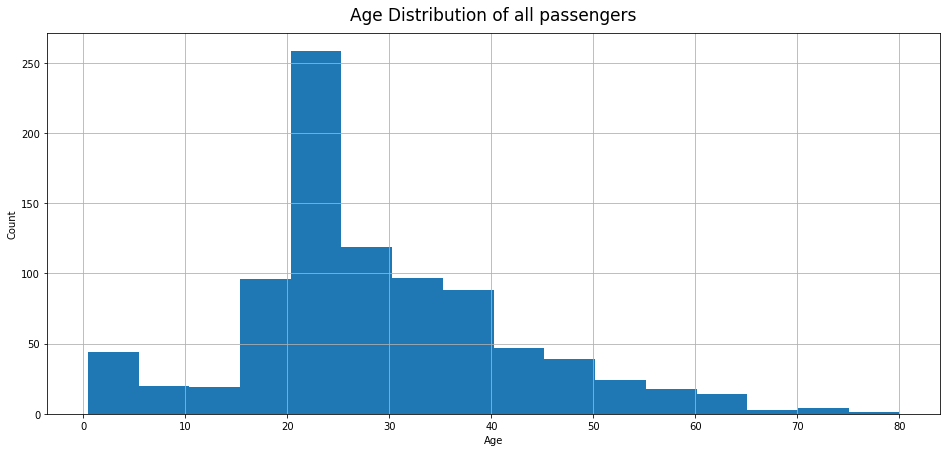

In [19]:
df['Age'].hist(bins=16 ,figsize=(16,7))
plt.title('Age Distribution of all passengers', size=17, pad=13)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)

In [20]:
# preview the data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [21]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,NaN,29.112424,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,NaN,13.304424,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,NaN,21.500000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,NaN,26.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,NaN,36.000000,1.000000,0.000000,31.000000,NaN


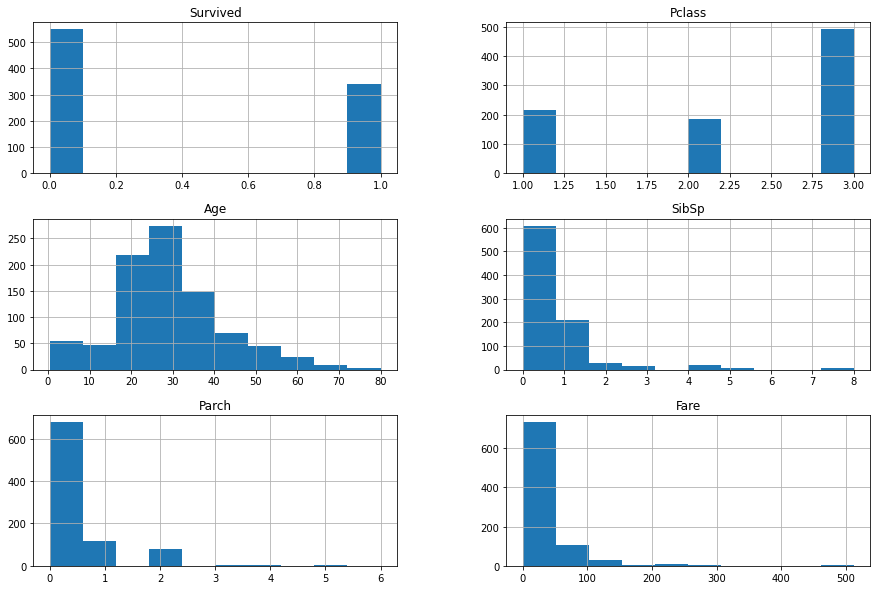

In [22]:
df.hist(figsize=(15,10));

In [23]:

y_train = df['Survived']
X_train = df.drop(columns=['Survived'])
X_train = pd.get_dummies(X_train)

In [24]:
# make normalization
for column in ['Pclass','Age','SibSp','Parch','Fare']:
    X_train[column] = X_train[column] / X_train[column].abs().max()
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.000000,0.2750,0.125,0.0,0.014151,0,1,0,0,1
1,0.333333,0.4750,0.125,0.0,0.139136,1,0,1,0,0
2,1.000000,0.3250,0.000,0.0,0.015469,1,0,0,0,1
3,0.333333,0.4375,0.125,0.0,0.103644,1,0,0,0,1
4,1.000000,0.4375,0.000,0.0,0.015713,0,1,0,0,1


In [25]:
# prepare test data
X_test = test_df.copy()
X_test.drop(columns=['Cabin','PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)
X_test['Age'] = X_test.apply(lambda x: grouped_sex_pclass_age.loc[x['Sex'], x['Pclass']]['median'] if (np.isnan(x['Age'])) else x['Age'],axis = 1)
X_test.fillna(df['Fare'].median(),inplace = True)
X_test = pd.get_dummies(X_test)
for column in ['Pclass','Age','SibSp','Parch','Fare']:
    X_test[column] = X_test[column] / X_test[column].abs().max()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    float64
 1   Age         418 non-null    float64
 2   SibSp       418 non-null    float64
 3   Parch       418 non-null    float64
 4   Fare        418 non-null    float64
 5   Sex_female  418 non-null    uint8  
 6   Sex_male    418 non-null    uint8  
 7   Embarked_C  418 non-null    uint8  
 8   Embarked_Q  418 non-null    uint8  
 9   Embarked_S  418 non-null    uint8  
dtypes: float64(5), uint8(5)
memory usage: 18.5 KB


In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
model = SVC(random_state = 42)
parameters = {'kernel':['poly', 'rbf'],'C':[0.1, 1, 3,6, 10, 13]}
scorer = make_scorer(accuracy_score)
# Create the object.
grid_obj = GridSearchCV(model, parameters, scoring=scorer)
# Fit the data
grid_fit = grid_obj.fit(X_train, y_train)
best_model = grid_fit.best_estimator_
predicted = best_model.predict(X_test).astype(int)
predicted

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
output = pd.DataFrame({'passengerId':test_df.PassengerId,'Survived': predicted})
output.to_csv('my_submission.csv',index = False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
